#  Geolocation

- formulation of a solver.

- statistical simulations in order to determine sources of uncertainty

---

# 1 - Formulation

<img src='schematic.jpeg' alt='Drawing' align='right' style='width: 300px;'/>

We want to find the float horizontal position $\underline{x}=(x,y)$ of an underwater float 
given a number of **known variables**:
- $\underline{x}_s^i$ : source surface float horizontal position
- $t_e^i$ : time of emission for source $i$
- $\tilde{t}_r^i$ : time of reception of the signal emitted by source $i$ by the underwater float
- $\epsilon_i$ : signal detection, $\epsilon_i=1$ (detection) or $1$ (no detection)
- $z$ : underwater float depth(perfect knowledge), not used for now

'Perfect' knowledge is assumed for known variables wich amounts to say potential errors on there
estimates may be neglected.

**Unknown variables** are:
- $\underline{x}=(x,y)$ : underwater float position
- $\delta t$ : underwater float clock offset, $\delta t = \tilde{t}_r^i - t_r^i$, where 
$t_r^i$ is the true time of reception
- $\delta \underline{x}^i$ : vector difference between source $i$ transducer position and surface float position, $\delta \underline{x}^i = \underline{x}_t^i - \underline{x}_s^i$
- $\delta t_p (\underline{x},\underline{x}_t^i)$ : difference between actual $(t_r^i - t_e^i)$ and an priori time $t_p(\underline{x},\underline{x}_t^i)$ of propagation between $\underline{x}$ and $\underline{x}_t^i$.

For simplicity, we assume the assumed propagation time is a function of range only: $t_p(\underline{x},\underline{x}_t^i) = t_p(|| \underline{x} - \underline{x}_t^i ||)$.

$t_p$ may for example be given by an a priori estimate of velocity ($c_b$) along with a measure of velocity uncertainty ($e_c$). In this case, we expect the error on time to grow with range according to: $e_t \propto || \underline{x}_b - \underline{x}_t^i || /e_c$, where $\underline{x}_b$ is an a priori estimate for the float location.

A priori standard deviations for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta t_p  (\underline{x},\underline{x}_t^i)$ are
assumed to be known and given by: $e_x$, $e_{\delta t}$, $e_{\delta x}$, $e_{tp}$.

Background (a priori) estimates for $\underline{x}$, $\delta t$, $\delta \underline{x}^i$, $\delta t_p (\underline{x},\underline{x}_t^i)$ may eventually be provided. We assume all are 0 for now except
for the float position $\underline{x}_b=(x=1km, y=0km)$.


The estimate of the underwater float position $\underline{\hat{x}}$ minimizes:

$$
\begin{align*}
J(\mathbf{x}, \delta t, \delta c (\underline{x},\underline{x}_t^i)) &= 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times  \delta t (\underline{x},\underline{x}_t^i)^2 / e_{tp}^2 \\
&= 
||\underline{x} - \underline{x}_b||^2 /e_x^2
+ \delta t^2 / e_{\delta t}^2 
+ \sum_i \epsilon_i \times \big [ \tilde{t}_r^i + \delta t  - t_e^i  -  t_p(\underline{x},\underline{x}_t^i) \big ]^2 / e_{tp}^2
\end{align*}
$$

We assume $\epsilon_i=1$ in all examples below for simplicity.

We have assumed simultaneous (working assumption) emission of sources.
The underwater float velocity may be added as an extra variable (future addition).

In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt

from clib.geolocation import *

---
# 2 - Create an ensemble of sources

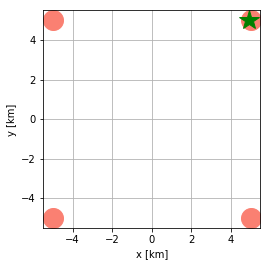

In [2]:
### create an ensemble of sources
dx=10. *1.e3 # in meters
sources=[]
sources.append(source(-dx*.5,-dx*.5))
sources.append(source(dx*.5,-dx*.5))
sources.append(source(dx*.5,dx*.5))
sources.append(source(-dx*.5,dx*.5))
Ns = len(sources)

### init a receiver
#r=receiver(0. *1.e3, 0. *1.e3, e_x=10.e3)
r=receiver(4.9 *1.e3, 5. *1.e3, e_x=10.e3)

### init mapping
pmap = xtmap(c_b=1500., e_c=10., e_min=1.e-3)

### plot
plt.figure()
ax=plt.subplot(111)
[s.plot() for s in sources]
r.plot()
ax.grid()
ax.set_aspect('equal')
plt.xlabel('x [km]')
plt.ylabel('y [km]')
plt.show()

In [3]:
for i, s in enumerate(sources):
    print('Distance source %d - float = %.2f km' %(i, dist(s,r)/1.e3))
    print('    horizontal offset for a sound celerity difference of %.1f m/s = %.2f m' %(10., dist(s,r)*10./1500.))
    print('    corresponding propagation time uncertainty %.2e s' %(dist(s,r)*10./1500.**2))    

Distance source 0 - float = 14.07 km
    horizontal offset for a sound celerity difference of 10.0 m/s = 93.81 m
    corresponding propagation time uncertainty 6.25e-02 s
Distance source 1 - float = 10.00 km
    horizontal offset for a sound celerity difference of 10.0 m/s = 66.67 m
    corresponding propagation time uncertainty 4.44e-02 s
Distance source 2 - float = 0.10 km
    horizontal offset for a sound celerity difference of 10.0 m/s = 0.67 m
    corresponding propagation time uncertainty 4.44e-04 s
Distance source 3 - float = 9.90 km
    horizontal offset for a sound celerity difference of 10.0 m/s = 66.00 m
    corresponding propagation time uncertainty 4.40e-02 s


**- A priori uncertainties and estimates are :**

In [4]:
# a priori uncertainties : 
print("e_c  = %.1f m/s  (celerity)" %pmap.e_c)
print("e_dt = %.1f s  (clock drift)" %r.e_dt)
print("e_x  = %.1f m  (underwater float position)" %r.e_x)
#print("e_dx = %.1f m  (dx between transducer and surface float)" %s.e_dx)

e_c  = 10.0 m/s  (celerity)
e_dt = 1.0 s  (clock drift)
e_x  = 10000.0 m  (underwater float position)


In [5]:
# a priori estimates :
#x0 = np.zeros((3))
# a priori position :
#x0[0] = 1.e3
#x0[1] = 0.e3 

---
# 3 - No clock drift

For each source-receiver acoustic path, a random value of c is drawn around **c_b = 1500m/s**.
The standard deviation of the celerity is **e_c = 10 m/s**.

**- The true underwater float position and clock offset are:**

In [6]:
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

x = 4900.0 m 
y = 5000.0 m 
dt = 2.6e-01 s


**- Unchanged variables during simulations are : **

In [7]:
print("s.x_t :", [s.x_t for s in sources])
print("s.y_t :", [s.y_t for s in sources])
print("s.dx  :", [s.dx for s in sources])
print("s.dy  :", [s.dy for s in sources])
print("r.dt  :", r.dt)

s.x_t : [array([-4996.65483871]), array([4988.15611812]), array([5003.10768139]), array([-4990.00800976])]
s.y_t : [array([-5000.2735363]), array([-5003.27715583]), array([5006.19777212]), array([5002.03686036])]
s.dx  : [array([3.34516129]), array([-11.84388188]), array([3.10768139]), array([9.99199024])]
s.dy  : [array([-0.2735363]), array([-3.27715583]), array([6.19777212]), array([2.03686036])]
r.dt  : [0.26331637]


**- Simulations : only celerity between receiver and each source is changing** 

In [8]:
Nmc = 100
x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
su=np.zeros(Nmc)

for i in range(Nmc):
    # solve a first time
    r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
    x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, clock_drift=False)
    # rerun with adjusted expected errors on propagation time
    for j in range(1):
        x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, clock_drift=False, \
                                                                     x0=[x[i], y[i], dt[i]])

d_rms = np.sqrt( np.mean( (x - r.x)**2  + (y - r.y)**2 ) )
bias_x = x.mean()-r.x
bias_y = y.mean()-r.y
print('\nrms error, x bias, y bias: %.1fm, %.1fm, %.1fm ' %(d_rms, bias_x, bias_y))



rms error, x bias, y bias: 71.5m, 25.5m, 5.8m 


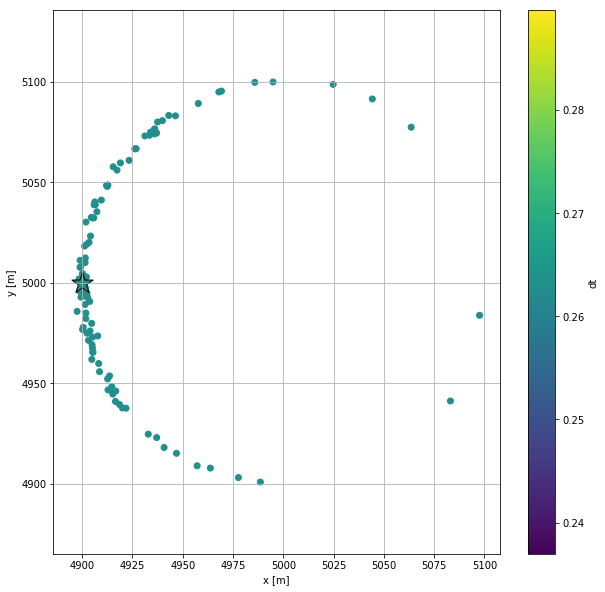

In [9]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

norm = plt.Normalize(dt.min(), dt.max())
sc = ax.scatter(x,y, c=dt, label='estimates', norm=norm)

ax.scatter(r.x, r.y, s=500., c=r.dt[0], marker='*', edgecolors='k', \
           linewidths=1. ,label='truth', norm=norm)
cb = plt.colorbar(sc, ax=ax)
cb.set_label('dt')

ax.axis('equal')
ax.grid()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

---
# same but with a small clock drift value and error

In [10]:
#r.draw_clock_drift(r.e_dt/10.)
r.draw_clock_drift(.01)
print("e_dt = %.1e s  (expected clock drift amplitude)" %r.e_dt)
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

e_dt = 1.0e-02 s  (expected clock drift amplitude)
x = 4900.0 m 
y = 5000.0 m 
dt = -1.0e-02 s


In [11]:
Nmc = 100
x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
su=np.zeros(Nmc)

for i in range(Nmc):
    # solve a first time
    r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
    x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap)
    # rerun with adjusted expected errors on propagation time
    for j in range(2):
        x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, \
                                                                     x0=[x[i], y[i], dt[i]])

d_rms = np.sqrt( np.mean( (x - r.x)**2  + (y - r.y)**2 ) )
bias_x = x.mean()-r.x
bias_y = y.mean()-r.y
print('\nrms error, x bias, y bias: %.1fm, %.1fm, %.1fm ' %(d_rms, bias_x, bias_y))


No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations

rms error, x bias, y bias: 56.1m, 29.1m, -14.6m 


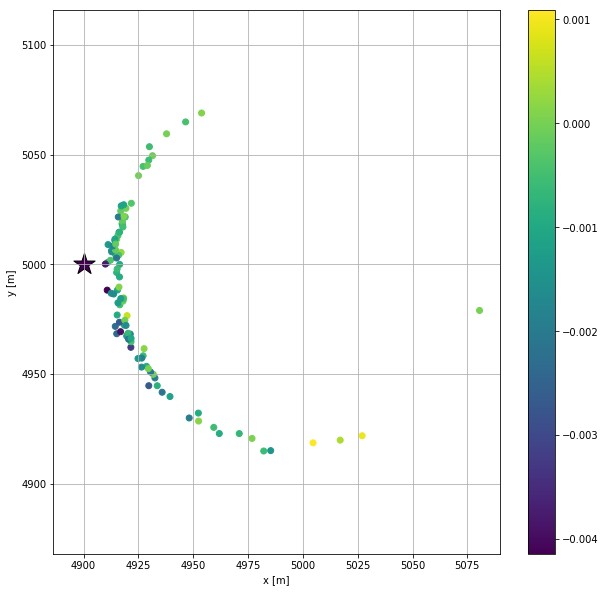

In [12]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

norm = plt.Normalize(dt.min(), dt.max())
sc = ax.scatter(x,y, c=dt, label='estimates', norm=norm)

plt.colorbar(sc, ax=ax)
ax.scatter(r.x, r.y, s=500., c=r.dt[0], marker='*', edgecolors='k', \
           linewidths=1. ,label='truth', norm=norm)

ax.axis('equal')
ax.grid()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

---
# with a larger clock drift value and error

In [13]:
#r.draw_clock_drift(r.e_dt/10.)
r.draw_clock_drift(.1)
print("e_dt = %.1e s  (expected clock drift amplitude)" %r.e_dt)
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

e_dt = 1.0e-01 s  (expected clock drift amplitude)
x = 4900.0 m 
y = 5000.0 m 
dt = -2.2e-01 s


In [14]:
Nmc = 100
x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
su=np.zeros(Nmc)

for i in range(Nmc):
    # solve a first time
    r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
    x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap)
    # rerun with adjusted expected errors on propagation time
    for j in range(2):
        x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, \
                                                                     x0=[x[i], y[i], dt[i]])

d_rms = np.sqrt( np.mean( (x - r.x)**2  + (y - r.y)**2 ) )
bias_x = x.mean()-r.x
bias_y = y.mean()-r.y
print('\nrms error, x bias, y bias: %.1fm, %.1fm, %.1fm ' %(d_rms, bias_x, bias_y))



rms error, x bias, y bias: 61.2m, 50.4m, -18.2m 


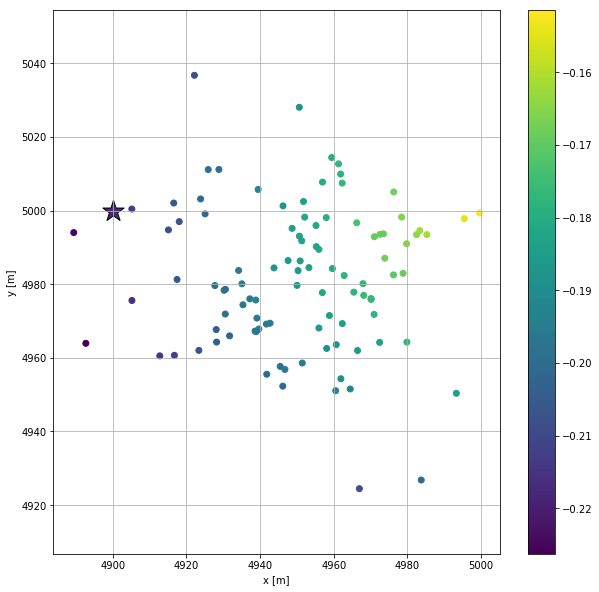

In [15]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

norm = plt.Normalize(dt.min(), dt.max())
sc = ax.scatter(x,y, c=dt, label='estimates', norm=norm)

plt.colorbar(sc, ax=ax)
ax.scatter(r.x, r.y, s=500., c=r.dt[0], marker='*', edgecolors='k', \
           linewidths=1. ,label='truth', norm=norm)

ax.axis('equal')
ax.grid()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

---
# with a much larger clock drift value and error

In [16]:
#r.draw_clock_drift(r.e_dt/10.)
r.draw_clock_drift(1.)
print("e_dt = %.1e s  (expected clock drift amplitude)" %r.e_dt)
print('x = %.1f m \ny = %.1f m \ndt = %.1e s' %(r.x, r.y, r.dt))

e_dt = 1.0e+00 s  (expected clock drift amplitude)
x = 4900.0 m 
y = 5000.0 m 
dt = 4.2e-01 s


In [17]:
Nmc = 100
x=np.zeros(Nmc)
y=np.zeros(Nmc)
dt=np.zeros(Nmc)
su=np.zeros(Nmc)

for i in range(Nmc):
    # solve a first time
    r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
    x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap)
    # rerun with adjusted expected errors on propagation time
    for j in range(2):
        x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, \
                                                                     x0=[x[i], y[i], dt[i]])

d_rms = np.sqrt( np.mean( (x - r.x)**2  + (y - r.y)**2 ) )
bias_x = x.mean()-r.x
bias_y = y.mean()-r.y
print('\nrms error, x bias, y bias: %.1fm, %.1fm, %.1fm ' %(d_rms, bias_x, bias_y))


No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations

rms error, x bias, y bias: 402.4m, 165.5m, 152.5m 


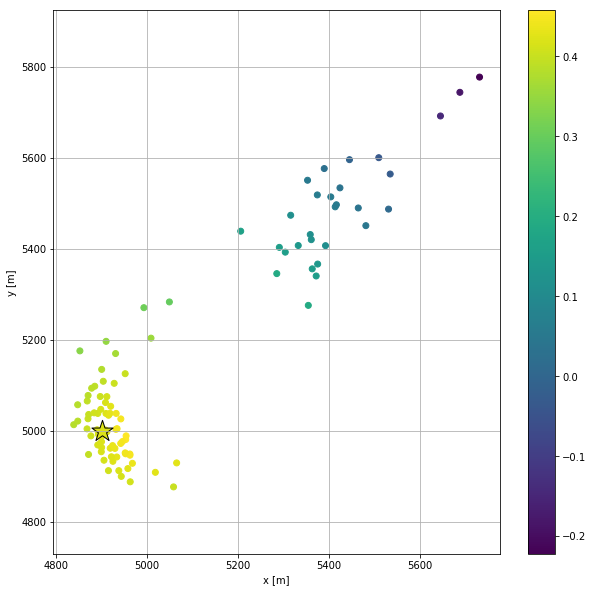

In [18]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)

norm = plt.Normalize(dt.min(), dt.max())
sc = ax.scatter(x,y, c=dt, label='estimates', norm=norm)

plt.colorbar(sc, ax=ax)
ax.scatter(r.x, r.y, s=500., c=r.dt[0], marker='*', edgecolors='k', \
           linewidths=1. ,label='truth', norm=norm)

ax.axis('equal')
ax.grid()
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
plt.show()

---
# 5 - Transects

Calculations to create a map take a long time : it seems better to work with only one transect. 

In [12]:
def simu (r, sources, Nmc, var) : 
    x=np.zeros(Nmc)
    y=np.zeros(Nmc)
    dt=np.zeros(Nmc)
    for i in range(Nmc):
        
        if var == 'celerity' :
            r.t_r_tilda = np.array([s.t_e+pmap.draw_t(dist(s,r))+r.dt for s in sources]).squeeze()
        if var == 'dxdy' :
            [s.draw_dxdy(10.) for s in sources]
        if var == 'clock' : 
            r.draw_clock_drift()
            #dt_truth[i] = r.dt
        x[i], y[i], dt[i], success, message, res = geolocalize_xtmap(r, sources, pmap, disp=False)

    # rms error on the receiver position
    d_rms = np.sqrt( np.mean( (x - r.x)**2  + (y - r.y)**2 ) )
    # biais on the receiver position
    bias_x = x.mean()-r.x
    bias_y = y.mean()-r.y
    bias = np.sqrt(bias_x**2 + bias_y**2)
    return d_rms, bias, bias_x, bias_y

**- Calculation and plot functions for transects : **

In [13]:
def transect (sources, X, Y, Nmc, var) :
    RMS_t = np.zeros((len(X)))
    Bias_t = np.zeros((len(X)))
    Bias_x = np.zeros((len(X)))
    Bias_y = np.zeros((len(X)))
    for i in range (len(X)) :
        # init a receiver
        r = receiver(X[i], Y)
        r.dt = 1. # unchanged variable during simulations 
        #
        d_rms, bias, bias_x, bias_y = simu (r, sources, Nmc, var = var) 
        RMS_t[i]   = d_rms
        Bias_t[i] = bias
        Bias_x[i] = bias_x
        Bias_y[i] = bias_y
    return RMS_t, Bias_t, Bias_x, Bias_y


def plot_transect (sources, X, Y, RMS_t, Bias_t, Bias_x, Bias_y):
    print('min (rms) = %.1f m' %np.min(RMS_t))
    print('min (bias) = %.1f m' %np.min(Bias_t))
    plt.figure(figsize=(17,10))
    # plot sources 
    ax=plt.subplot(221)
    [s.plot() for s in sources]
    plt.title ('sources and transect')
    plt.xlabel('x [km]')
    plt.ylabel('y [km]')
    ax.grid()
    #ax.set_xlim([np.min(X)/1000.,np.max(X)/1000.])
    ax.set_ylim([-abs(sources[0].y_s)/1000. - 5., abs(sources[0].y_s)/1000. + 5.])
    ax.set_aspect('equal')
    plt.plot([np.min(X)/1000.,np.max(X)/1000.],[Y/1000.,Y/1000.],'.-b')

    ## plot rms result
    ax2 = plt.subplot(222)
    ax2.grid()
    plt.plot(X/1.e3, RMS_t, '.') 
    plt.xlabel('x [km]')
    plt.ylabel('RMS [m]')
    plt.title('RMS error along the transect Y=%.dkm' %int(Y/1000.))
    
    ## plot bias
    ax3  = plt.subplot(223)
    ax3.grid()
    plt.plot(X/1.e3, Bias_t, '.')
    plt.xlabel('x [km]')
    plt.ylabel('Bias [m]')
    plt.title('Bias along the transect Y=%.dkm' %int(Y/1000.))

    ## plot bias
    ax3  = plt.subplot(224)
    ax3.grid()
    plt.plot(X/1.e3, Bias_x, '.', color='k', label='x')
    plt.plot(X/1.e3, Bias_y, '.', color='r', label='y')
    plt.xlabel('x [km]')
    plt.ylabel('Bias [m]')
    plt.legend()
    plt.title('x (black) and y (red) biases along the transect Y=%.dkm' %int(Y/1000.))    
    
    plt.show()

**- Creation of a transect : **

In [14]:
L = 20.* 1.e3
X = np.linspace(-L/2.,L/2.,100)  # resolution : 200m
Y = 0. 

**A - Distance between sources : 10km, with Y=0 km **

In [15]:
Nmc = 100          # number of simulations
var = 'celerity'   # only celerity is varying

In [17]:
RMS_t, Biais_t, Bias_x, Bias_y = transect (sources, X, Y, Nmc, var)

min (rms) = 42.0 m
min (bias) = 0.8 m


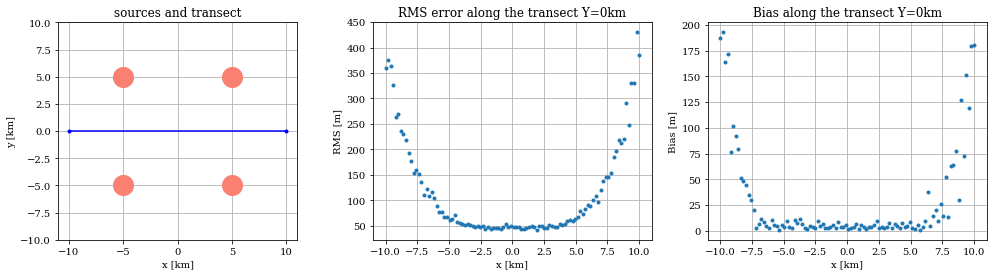

In [18]:
plot_transect(sources, X, Y, RMS_t, Biais_t, Bias_x, Bias_y)

**B - Same distance, with Y=5 km **

In [19]:
X = np.linspace(L/4.-2.e3,L/4.+1.e3,10)  # resolution : 200m
Y = 5000.

In [20]:
RMS_t5, Bias_t5, Bias_x, Bias_y = transect (sources, X, Y, Nmc, var)

No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more iterations
No convergence, try with 1000 more

min (rms) = 73.5 m
min (bias) = 3.6 m


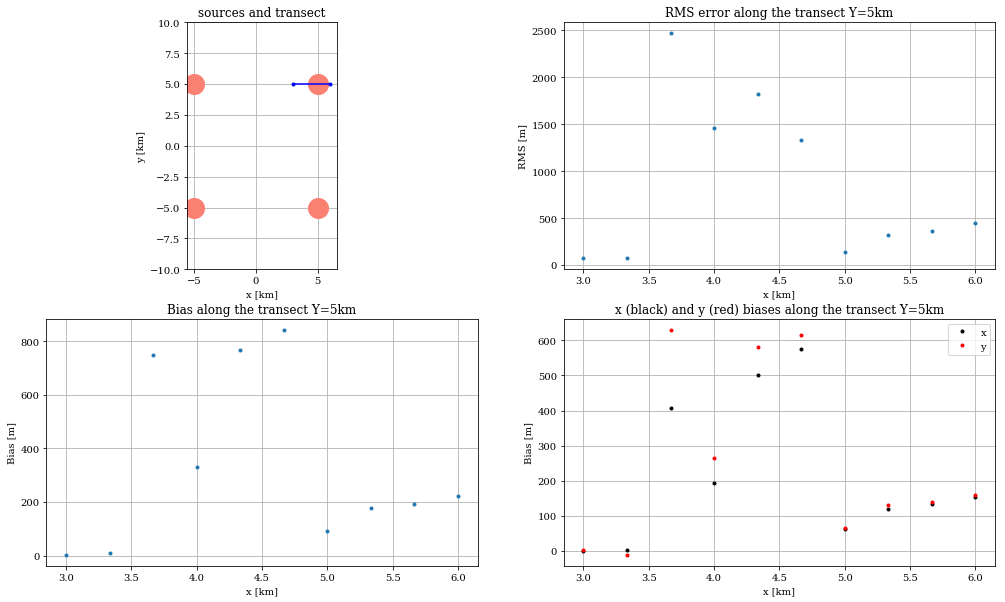

In [21]:
plot_transect(sources, X, Y, RMS_t5, Bias_t5, Bias_x, Bias_y)